# ENSAE - 2A - Econometrics 1 - TD7
# 28/11/2024


In [1]:

# Set up ----
# Load necessary libraries
library(haven)     # For reading Stata files
library(dplyr)     # For data manipulation
library(estimatr)  # For robust regression
library(stats)     # For performing test

# Load the data

getwd()
data <- read_dta('nsw.dta')


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




[1] "/Users/elouan/Repo Github ElouanBahri/ENSAE_econometrics_2A/src/TD7"

2. Describe the sample and perform some descriptive statistics

In [2]:
# Q2: Descriptive statistics ----
summary(data)
data %>% 
  count(education) %>% 
  mutate(perc = round(prop.table(n),3),
         cum = round(cumsum(prop.table(n)),3))

   data_id              treat             age          education    
 Length:722         Min.   :0.0000   Min.   :17.00   Min.   : 3.00  
 Class :character   1st Qu.:0.0000   1st Qu.:19.00   1st Qu.: 9.00  
 Mode  :character   Median :0.0000   Median :23.00   Median :10.00  
                    Mean   :0.4114   Mean   :24.52   Mean   :10.27  
                    3rd Qu.:1.0000   3rd Qu.:27.00   3rd Qu.:11.00  
                    Max.   :1.0000   Max.   :55.00   Max.   :16.00  
     black           hispanic         married         nodegree     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:1.0000  
 Median :1.0000   Median :0.0000   Median :0.000   Median :1.0000  
 Mean   :0.8006   Mean   :0.1053   Mean   :0.162   Mean   :0.7798  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
      re75              re78      
 Min. 

education,n,perc,cum
<dbl>,<int>,<dbl>,<dbl>
3,1,0.001,0.001
4,6,0.008,0.010
5,5,0.007,0.017
6,7,0.010,0.026
7,15,0.021,0.047
8,62,0.086,0.133
9,110,0.152,0.285
10,162,0.224,0.510
11,195,0.270,0.780


3. Compute Y 1 −Y 0, where we let Y d = ∑
i:Di=d Yi/nd and nd denotes the size of the subsam-
ple {i : Di = d}. Show, under an assumption to be speciﬁed, that this diﬀerence estimates
without bias a causal parameter to be also speciﬁed.

In [3]:
# Q3: compute Ybar(1) - Ybar(0) ----

ybar <- data %>% group_by(treat) %>% summarise(mean = mean(re78))
ybar
diff_ybar <- filter(ybar, treat == 1)$mean - filter(ybar, treat == 0)$mean
diff_ybar

treat,mean
<dbl>,<dbl>
0,5090.048
1,5976.352


[1] 886.3037

4. Perform a regression of Y on D. Was the result on the coefficient expected? Has the
treatment a significant effect (at the 5% level) on income?

In [4]:
# Q4: Perform a regression of Y on D. Was the result on the coefficient expected? ----

model = lm_robust(re78 ~ treat, se_type = "stata", data = data)
summary(model)



Call:
lm_robust(formula = re78 ~ treat, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper  DF
(Intercept)   5090.0      277.4  18.347 5.599e-62  4545.39     5635 720
treat          886.3      488.1   1.816 6.984e-02   -72.04     1845 720

Multiple R-squared:  0.004872 ,	Adjusted R-squared:  0.003489 
F-statistic: 3.297 on 1 and 720 DF,  p-value: 0.06984

5. How can we test that the assignment to treatment was indeed made randomly? Perform these tests and comment them. 


Warning message in ks.test.default(income_control, income_treated):
“les valeurs p seront approximées en présence d'ex-aequos”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  income_control and income_treated
D = 0.049071, p-value = 0.7938
alternative hypothesis: two-sided


Warning message in ks.test.default(age_treated, age_control):
“les valeurs p seront approximées en présence d'ex-aequos”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  age_treated and age_control
D = 0.045855, p-value = 0.8558
alternative hypothesis: two-sided


         treat
education   0   1
       3    1   0
       4    2   4
       5    2   3
       6    5   2
       7   11   4
       8   36  26
       9   66  44
       10 105  57
       11 118  77
       12  61  61
       13  12  11
       14   6   5
       15   0   2
       16   0   1

Warning message in chisq.test(education_treat_table):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  education_treat_table
X-squared = 16.227, df = 13, p-value = 0.2371


    treat
age   0  1
  17 30 22
  18 49 26
  19 38 25
  20 37 21
  21 19 21
  22 25 17
  23 19 22
  24 23 14
  25 32 24
  26 21 14
  27 22 25
  28 23  8
  29 14 10
  30  7  5
  31 14  8
  32  5  2
  33  5  5
  34  9  2
  35  4  3

Warning message in chisq.test(age_treat_table):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  age_treat_table
X-squared = 16.249, df = 18, p-value = 0.5752



Variable: black 

	Welch Two Sample t-test

data:  control and treated
t = -0.04452, df = 637.88, p-value = 0.9645
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06075168  0.05805808
sample estimates:
mean of x mean of y 
0.8000000 0.8013468 


Variable: hispanic 

	Welch Two Sample t-test

data:  control and treated
t = 0.8148, df = 667.06, p-value = 0.4155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02631467  0.06364484
sample estimates:
 mean of x  mean of y 
0.11294118 0.09427609 


Variable: married 

	Welch Two Sample t-test

data:  control and treated
t = -0.38172, df = 626.12, p-value = 0.7028
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06576534  0.04435912
sample estimates:
mean of x mean of y 
0.1576471 0.1683502 


Variable: nodegree 

	Welch Two Sample t-test

data:  control and treated
t = 2.6115, df 

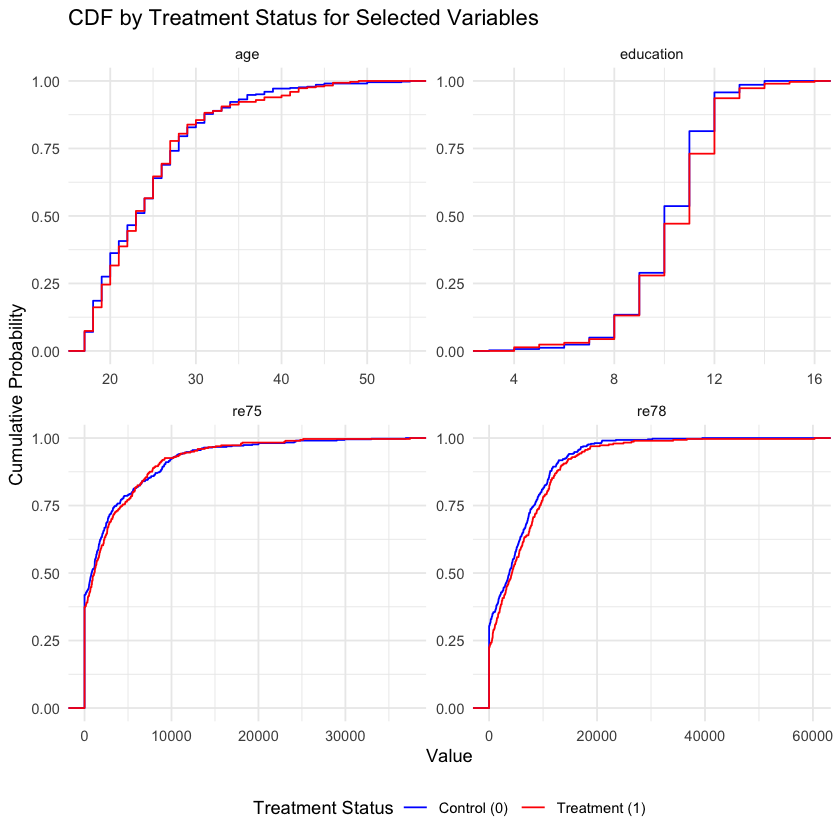

In [5]:

# Continuous variable: re75 and age --> perform Kolmogorov-Smironov test

# For income (re75)
# Get re75 distribution by group
income_control <- data %>% filter(treat == 0) %>% pull(re75)
income_treated <- data %>% filter(treat == 1) %>% pull(re75)

# Perform Kolmogorov-Smirnov test for re75 by treat
ks_test_re75 <- ks.test(income_control, income_treated)
ks_test_re75

# Same for age
# Get age distribution by group
age_control <- data %>% filter(treat == 0) %>% pull(age)
age_treated <- data %>% filter(treat == 1) %>% pull(age)

# Perform Kolmogorov-Smirnov test for age by treat
ks_test_age <- ks.test(age_treated, age_control)
ks_test_age

# Categorical variable: education and age (age can be both) --> perform chi2 test

# For education
education_treat_table <- table(education = data$education, treat = data$treat)
education_treat_table
chi2_test_educ <- chisq.test(education_treat_table)
chi2_test_educ

# Same for education
age_treat_table <- table(age = filter(data, age <= 35)$age, treat = filter(data, age <= 35)$treat)
age_treat_table
chi2_test_age <- chisq.test(age_treat_table)
chi2_test_age

# For dummy variables: student test
dummy_vars <- c("black", "hispanic", "married", "nodegree")

# Loop through each variable and perform t-test
t_test_results <- lapply(dummy_vars, function(var) {
  # Subset the data by treatment group
  control <- data[data$treat == 0, var, drop = TRUE]
  treated <- data[data$treat == 1, var, drop = TRUE]
  
  # Perform t-test assuming unequal variances
  t_test <- t.test(control, treated, var.equal = FALSE)
  
  # Store results in a list
  list(variable = var, t_test = t_test)
})

# Print the results
for (result in t_test_results) {
  cat("\nVariable:", result$variable, "\n")
  print(result$t_test)
}

# Optional: plot distribution fort some variables
library(tidyr)
library(ggplot2)
vars_to_plot = c('age', 'education', 're75', 're78')
data_long <- data %>%
  select(treat, all_of(vars_to_plot)) %>%
  pivot_longer(cols = -treat, names_to = "variable", values_to = "value")

# Plot CDFs
ggplot(data_long, aes(x = value, color = as.factor(treat))) +
  stat_ecdf() +  # Empirical CDF
  facet_wrap(~variable, scales = "free") +  # One panel per variable
  scale_color_manual(values = c("blue", "red"), labels = c("Control (0)", "Treatment (1)")) +
  # coord_cartesian(xlim = c(0, 30000)) +
  labs(
    x = "Value",
    y = "Cumulative Probability",
    color = "Treatment Status",
    title = "CDF by Treatment Status for Selected Variables"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

6. Run a regression of Y on 1975 income and then on nodegree. Comment on the results.
Do the results challenge the assumption posited in Question 3 ?

In [6]:
# Q6: Run a regression of $Y$ on 1975 income and then on nodegree. ----
model2 = lm_robust(re78 ~ re75, se_type = "stata", data = data)
summary(model2)
model3 = lm_robust(re78 ~ nodegree, se_type = "stata", data = data)
summary(model3)


Call:
lm_robust(formula = re78 ~ re75, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)  CI Lower  CI Upper  DF
(Intercept) 4872.8804  277.46495   17.56 9.776e-58 4.328e+03 5417.6174 720
re75           0.1912    0.05707    3.35 8.508e-04 7.914e-02    0.3032 720

Multiple R-squared:  0.02399 ,	Adjusted R-squared:  0.02264 
F-statistic: 11.22 on 1 and 720 DF,  p-value: 0.0008508


Call:
lm_robust(formula = re78 ~ nodegree, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper  DF
(Intercept)     6451      551.8  11.692 4.876e-29     5368  7534.53 720
nodegree       -1278      607.2  -2.105 3.564e-02    -2470   -86.02 720

Multiple R-squared:  0.007185 ,	Adjusted R-squared:  0.005806 
F-statistic: 4.431 on 1 and 720 DF,  p-value: 0.03564

7. Merge the two datasets, the one from LaLonde experimental sample (nsw.dta) and the one
from the whole US population (psid_controls.dta). Describe the variables and compute
descriptive statistics according to the sample source. What do you remark? Could you
argue the LaLonde sample is representative of the whole US population? If not, how would
you describe that sample’s characteristics?

In [7]:

# Load second dataset
data2 <- read_dta('psid_controls.dta', col_select = names(data))

# Combine (row bind) the two datasets
data = rbind(data, data2)

# Get mean by dataset for all variables
data %>% group_by(data_id) %>% summarise_all(mean)

data_id,treat,age,education,black,hispanic,married,nodegree,re75,re78
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lalonde Sample,0.4113573,24.52078,10.26731,0.8005540,0.10526316,0.1620499,0.7797784,3042.897,5454.636
PSID,0.0000000,34.85060,12.11687,0.2506024,0.03253012,0.8662651,0.3052209,19063.338,21553.921


We now drop the control observations from the experimental data (that is, the observations from
LaLonde sample that were not treated: the individuals who did not follow the NSWD program).

8. With the remaining observations, compute an estimate of the treatment eﬀect using a simple linear regression. What do you ﬁnd? Explain the result.

In [8]:
# With the remaining observations, compute an estimate of the treatment effect using a simple linear regression.
data = data %>% filter(data_id == 'PSID' | (data_id == 'Lalonde Sample' & treat == 1))
model4 = lm_robust(re78 ~ treat, se_type = "stata", data = data)
summary(model4)

# Recall estimates on experimental sample only
summary(model)

# Why the result are so different?
variables <- c("age", "education", "black", "hispanic", "married", "nodegree", "re75")

# Perform t-test for each variable
t_test_results <- lapply(variables, function(var) {
  # Extract values for each treatment group
  group1 <- data[data$treat == 0, var, drop = TRUE] # control in representative sample
  group2 <- data[data$treat == 1, var, drop = TRUE] # treated in experimental sample
  
  # Perform t-test assuming unequal variances
  t_test <- t.test(group1, group2, var.equal = FALSE)
  
  # Store results in a list
  list(variable = var, t_test = t_test)
})

# Print the results
for (result in t_test_results) {
  cat("\nVariable:", result$variable, "\n")
  print(result$t_test)
}


Call:
lm_robust(formula = re78 ~ treat, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|) CI Lower CI Upper   DF
(Intercept)    21554      311.8   69.13  0.000e+00    20943    22165 2785
treat         -15578      508.1  -30.66 4.241e-178   -16574   -14581 2785

Multiple R-squared:  0.09457 ,	Adjusted R-squared:  0.09425 
F-statistic: 939.9 on 1 and 2785 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = re78 ~ treat, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper  DF
(Intercept)   5090.0      277.4  18.347 5.599e-62  4545.39     5635 720
treat          886.3      488.1   1.816 6.984e-02   -72.04     1845 720

Multiple R-squared:  0.004872 ,	Adjusted R-squared:  0.003489 
F-statistic: 3.297 on 1 and 720 DF,  p-value: 0.06984


Variable: age 

	Welch Two Sample t-test

data:  group1 and group2
t = 23.195, df = 488.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9.358228 11.090451
sample estimates:
mean of x mean of y 
 34.85060  24.62626 


Variable: education 

	Welch Two Sample t-test

data:  group1 and group2
t = 14.206, df = 526.51, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.496274 1.976518
sample estimates:
mean of x mean of y 
 12.11687  10.38047 


Variable: black 

	Welch Two Sample t-test

data:  group1 and group2
t = -22.24, df = 383.98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5994344 -0.5020543
sample estimates:
mean of x mean of y 
0.2506024 0.8013468 


Variable: hispanic 

	Welch Two Sample t-test

data:  group1 and group2
t = -3.5583, df = 322.44, p-value = 0.000429

10. Perform such a regression. Comment on the obtained estimates and standard errors. ----

In [9]:

model5 <- lm_robust(re78 ~ treat + age + education + black + hispanic + married + nodegree + re75,
                    se_type = "stata", data = data)
summary(model5)



Call:
lm_robust(formula = re78 ~ treat + age + education + black + 
    hispanic + married + nodegree + re75, data = data, se_type = "stata")

Standard error type:  HC1 

Coefficients:
              Estimate Std. Error t value   Pr(>|t|)   CI Lower CI Upper   DF
(Intercept) -1021.2980  1.941e+03 -0.5261  5.989e-01 -4827.6711 2785.075 2778
treat       -1457.9149  6.945e+02 -2.0993  3.588e-02 -2819.6611  -96.169 2778
age           -55.3223  2.247e+01 -2.4617  1.389e-02   -99.3884  -11.256 2778
education     673.1537  1.256e+02  5.3599  9.010e-08   426.8930  919.414 2778
black        -544.1791  4.411e+02 -1.2336  2.174e-01 -1409.1365  320.778 2778
hispanic     1912.2274  1.141e+03  1.6763  9.378e-02  -324.5053 4148.960 2778
married      1609.0797  5.054e+02  3.1839  1.469e-03   618.1149 2600.044 2778
nodegree      584.4034  6.195e+02  0.9434  3.455e-01  -630.2290 1799.036 2778
re75            0.7789  2.963e-02 26.2846 3.559e-136     0.7208    0.837 2778

Multiple R-squared:  0.5788 ,	Adj